This notebook takes in some city health dashboard data and makes a dummy version that Adi can play with.

In [19]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-white')

In [2]:
fname = '../data/cityhealthdashboard/CHDB_data_city_MA v3_0.txt'
df_city = pd.read_csv(fname, sep='\t')
df_city.head()

,state_abbr,state_fips,place_fips,stpl_fips,city_name,metric_name,metric_number,group_name,group_number,num,denom,est,lci,uci,county_indicator,educ_indicator,multiplier_indicator,data_yr_type,geo_level,date_export
0,MA,25,7000,2507000,Boston,Absenteeism,1,total population,1,8033.0,27493,29.2,-999.0,-999.0,0.0,-999.0,-999.0,2015-16,city,10/26/2018
1,MA,25,7000,2507000,Boston,Absenteeism,1,female,2,3775.0,13389,28.2,-999.0,-999.0,0.0,-999.0,-999.0,2015-16,city,10/26/2018
2,MA,25,7000,2507000,Boston,Absenteeism,1,male,3,4258.0,14104,30.2,-999.0,-999.0,0.0,-999.0,-999.0,2015-16,city,10/26/2018
3,MA,25,7000,2507000,Boston,Absenteeism,1,asian,4,300.0,2592,11.6,-999.0,-999.0,0.0,-999.0,-999.0,2015-16,city,10/26/2018
4,MA,25,7000,2507000,Boston,Absenteeism,1,black,5,3103.0,10270,30.2,-999.0,-999.0,0.0,-999.0,-999.0,2015-16,city,10/26/2018


In [10]:
df_city.query('city_name == "Boston"')[['state_fips', 'stpl_fips', 'place_fips']].drop_duplicates()

,state_fips,stpl_fips,place_fips
0,25,2507000,7000


Okay, as described the city-level data only has one entry for all of Boston. Let's go to the tract data, which should be able to be connected to zip code.

In [3]:
fname = '../data/cityhealthdashboard/CHDB_data_tract_MA v3_0.txt'
df_tract = pd.read_csv(fname, sep='\t')
df_tract.head()

,state_abbr,state_fips,county_fips,county_name,tract_code,stcotr_fips,city_name,metric_name,metric_number,group_name,group_number,num,denom,est,lci,uci,data_yr_type,geo_level,date_export
0,MA,25,5,Bristol County,640100,25005640100,Fall River,Air pollution - particulate matter,2,total population,1,-999.0,-999.0,6.7,-999.0,-999.0,"2013, 1 Year Estimate",tract,10/26/2018
1,MA,25,5,Bristol County,640200,25005640200,Fall River,Air pollution - particulate matter,2,total population,1,-999.0,-999.0,6.7,-999.0,-999.0,"2013, 1 Year Estimate",tract,10/26/2018
2,MA,25,5,Bristol County,640300,25005640300,Fall River,Air pollution - particulate matter,2,total population,1,-999.0,-999.0,6.7,-999.0,-999.0,"2013, 1 Year Estimate",tract,10/26/2018
3,MA,25,5,Bristol County,640400,25005640400,Fall River,Air pollution - particulate matter,2,total population,1,-999.0,-999.0,6.7,-999.0,-999.0,"2013, 1 Year Estimate",tract,10/26/2018
4,MA,25,5,Bristol County,640500,25005640500,Fall River,Air pollution - particulate matter,2,total population,1,-999.0,-999.0,6.7,-999.0,-999.0,"2013, 1 Year Estimate",tract,10/26/2018


In [18]:
df_tract.query('city_name == "Boston"')[['state_fips', 'county_fips', 'stcotr_fips']].drop_duplicates().head()

,state_fips,county_fips,stcotr_fips
267,25,25,25025000100
268,25,25,25025000201
269,25,25,25025000202
270,25,25,25025000301
271,25,25,25025000302


In [13]:
fgeo = '../data/cityhealthdashboard/Geographic Identifiers/CHDB_geographic_identifiers.csv'
df_geo = pd.read_csv(fgeo, dtype={'zip_code': str})
df_geo.head()

,state_abbr,state_name,state_fips,county_fips,stco_fips,county_name,place_fips,stpl_fips,city_name,tract_code,stcotr_fips,zip_code
0,AL,Alabama,1,73,1073,Jefferson County,1070,107000,Birmingham,100,1073000100,35206
1,AL,Alabama,1,73,1073,Jefferson County,1070,107000,Birmingham,300,1073000300,35212
2,AL,Alabama,1,73,1073,Jefferson County,1070,107000,Birmingham,400,1073000400,35217
3,AL,Alabama,1,73,1073,Jefferson County,1070,107000,Birmingham,500,1073000500,35212
4,AL,Alabama,1,73,1073,Jefferson County,1070,107000,Birmingham,700,1073000700,35207


Which columns do they have in common?

In [5]:
print(', '.join(df_geo.columns))
print(', '.join(df_city.columns))
print(', '.join(df_tract.columns))

state_abbr, state_name, state_fips, county_fips, stco_fips, county_name, place_fips, stpl_fips, city_name, tract_code, stcotr_fips, zip_code
state_abbr, state_fips, place_fips, stpl_fips, city_name, metric_name, metric_number, group_name, group_number, num, denom, est, lci, uci, county_indicator, educ_indicator, multiplier_indicator, data_yr_type, geo_level, date_export
state_abbr, state_fips, county_fips, county_name, tract_code, stcotr_fips, city_name, metric_name, metric_number, group_name, group_number, num, denom, est, lci, uci, data_yr_type, geo_level, date_export


In [16]:
df = pd.merge(df_tract.query('city_name == "Boston"'), df_geo, how='left')

In [17]:
df.head()

,state_abbr,state_fips,county_fips,county_name,tract_code,stcotr_fips,city_name,metric_name,metric_number,group_name,...,lci,uci,data_yr_type,geo_level,date_export,state_name,stco_fips,place_fips,stpl_fips,zip_code
0,MA,25,25,Suffolk County,100,25025000100,Boston,Air pollution - particulate matter,2,total population,...,-999.0,-999.0,"2013, 1 Year Estimate",tract,10/26/2018,Massachusetts,25025,25070,2507000,02134
1,MA,25,25,Suffolk County,201,25025000201,Boston,Air pollution - particulate matter,2,total population,...,-999.0,-999.0,"2013, 1 Year Estimate",tract,10/26/2018,Massachusetts,25025,25070,2507000,02135
2,MA,25,25,Suffolk County,202,25025000202,Boston,Air pollution - particulate matter,2,total population,...,-999.0,-999.0,"2013, 1 Year Estimate",tract,10/26/2018,Massachusetts,25025,25070,2507000,02135
3,MA,25,25,Suffolk County,301,25025000301,Boston,Air pollution - particulate matter,2,total population,...,-999.0,-999.0,"2013, 1 Year Estimate",tract,10/26/2018,Massachusetts,25025,25070,2507000,02135
4,MA,25,25,Suffolk County,302,25025000302,Boston,Air pollution - particulate matter,2,total population,...,-999.0,-999.0,"2013, 1 Year Estimate",tract,10/26/2018,Massachusetts,25025,25070,2507000,02135


In [20]:
df.columns

Index([u'state_abbr', u'state_fips', u'county_fips', u'county_name',
       u'tract_code', u'stcotr_fips', u'city_name', u'metric_name',
       u'metric_number', u'group_name', u'group_number', u'num', u'denom',
       u'est', u'lci', u'uci', u'data_yr_type', u'geo_level', u'date_export',
       u'state_name', u'stco_fips', u'place_fips', u'stpl_fips', u'zip_code'],
      dtype='object')

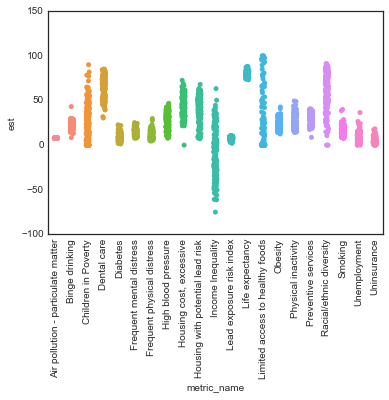

In [24]:
fig, ax = plt.subplots()
sns.stripplot(x='metric_name', y='est', data=df, ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [27]:
zips = df['zip_code'].unique()

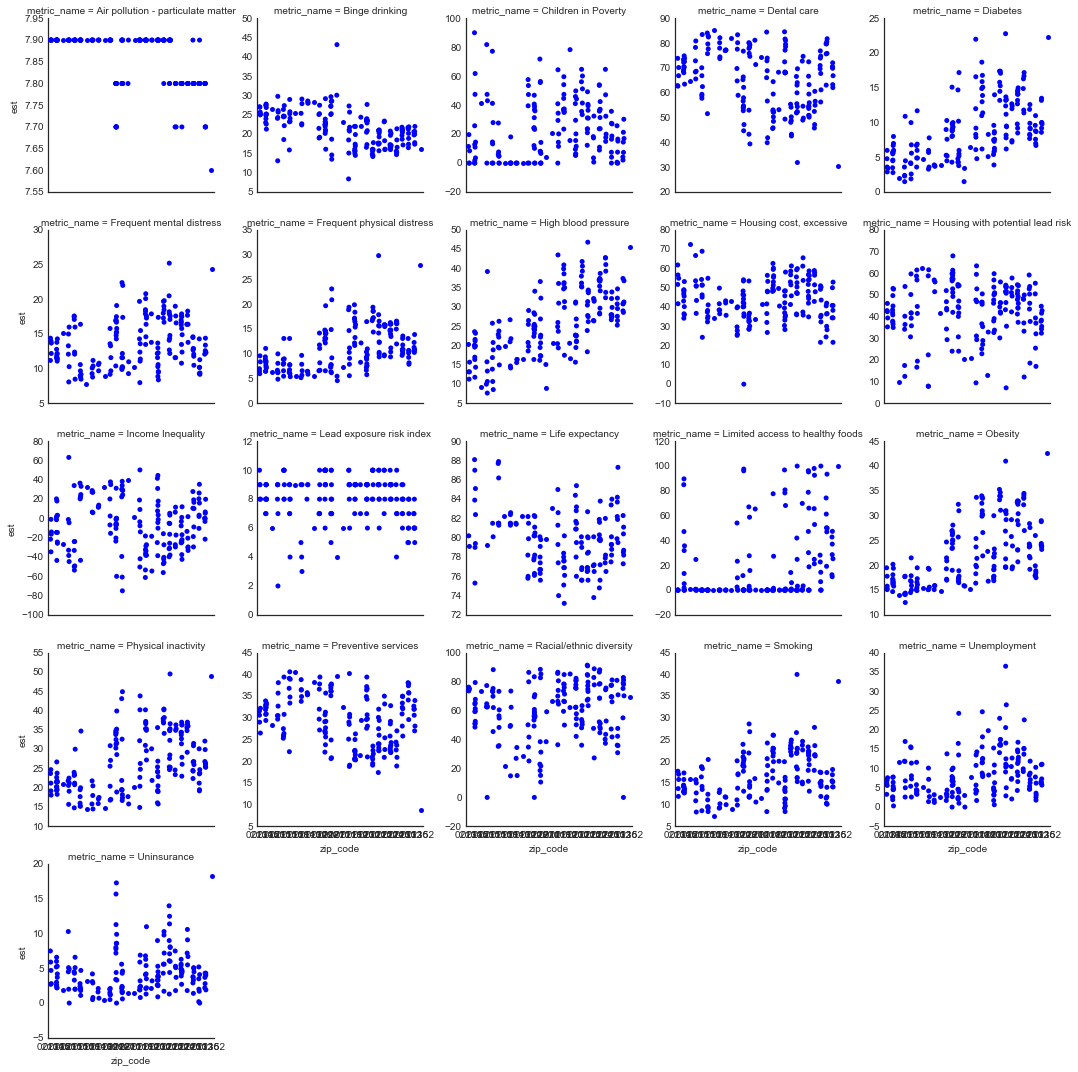

In [28]:
g = sns.FacetGrid(col='metric_name', col_wrap=5, data=df, sharey=False)
g.map(sns.stripplot, 'zip_code', 'est', order=zips)

In [38]:
df['zip_code_str'] = '"' + df['zip_code'] + '"'

In [39]:
df.query('metric_name == "Obesity"').to_csv('../data/cityhealthdashboard/boston_obesity.csv', index=False)

In [40]:
df.to_csv('../data/cityhealthdashboard/all_city_health_dashboard.csv', index=False)

Make zip code-level aggregate data and save as wide-form dataframe

In [51]:
meandf = (
    df
        .groupby(['metric_name', 'zip_code'])
        .mean()['est']
    ).reset_index()
meandf.head()

,metric_name,zip_code,est
0,Air pollution - particulate matter,02108,7.9
1,Air pollution - particulate matter,02109,7.9
2,Air pollution - particulate matter,02111,7.9
3,Air pollution - particulate matter,02113,7.9
4,Air pollution - particulate matter,02114,7.9


In [54]:
widedf = meandf.pivot(index='zip_code', columns='metric_name', values='est').reset_index()

In [56]:
widedf.head()

metric_name,zip_code,Air pollution - particulate matter,Binge drinking,Children in Poverty,Dental care,Diabetes,Frequent mental distress,Frequent physical distress,High blood pressure,"Housing cost, excessive",...,Lead exposure risk index,Life expectancy,Limited access to healthy foods,Obesity,Physical inactivity,Preventive services,Racial/ethnic diversity,Smoking,Unemployment,Uninsurance
0,02108,7.9,25.4,0.00,85.300000,4.70,7.800000,5.600000,19.900000,34.300000,...,9.000000,82.30,0.0,15.400000,14.400000,40.50,21.600000,7.400000,5.200000,3.200000
1,02109,7.9,28.4,0.00,82.200000,3.90,8.900000,5.600000,16.600000,42.900000,...,6.000000,82.30,0.0,14.900000,14.800000,38.20,28.800000,8.900000,2.600000,0.400000
2,02111,7.9,23.1,20.80,74.300000,6.50,10.200000,7.300000,20.700000,41.800000,...,6.000000,83.10,0.0,15.300000,20.300000,32.40,66.300000,11.500000,7.800000,1.500000
3,02113,7.9,28.3,0.00,77.166667,3.80,10.366667,6.266667,16.133333,40.333333,...,8.666667,81.45,0.0,15.633333,16.833333,35.50,25.533333,11.166667,2.066667,1.466667
4,02114,7.9,25.5,3.62,77.740000,5.28,9.960000,7.020000,19.680000,40.980000,...,6.000000,81.86,0.0,16.880000,18.120000,36.08,49.900000,10.980000,5.120000,2.300000


In [58]:
widedf.to_csv('../data/cityhealthdashboard/city_health_wide_data.csv', index=False)